<a href="https://colab.research.google.com/github/Bhakthipoorna/CapstoneProkjects/blob/main/Fifa_2020_(clustering_and_visualization_Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [ ]:
df=pd.read_csv('players_20.csv')

In [ ]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


####Numerical columns

In [ ]:
num_df=[features for features in df.columns if df[features].dtype!='O']

In [ ]:
num_df=df.copy()
num_df=num_df[['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number', 'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions','mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]

####Categorical columns

In [ ]:
cat_df=[features for features in df.columns if df[features].dtype=='O']

In [ ]:
cat_df=df.copy()
cat_df=df[['player_url', 'short_name', 'long_name', 'dob','nationality','club', 'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined', 'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']]

In [ ]:
cat_df.shape,num_df.shape

((18278, 43), (18278, 61))

In [ ]:
df['player_traits'].value_counts()

Early Crosser                                                       501
Power Free-Kick                                                     370
Long Passer (CPU AI Only)                                           354
Crowd Favourite                                                     296
Argues with Officials                                               294
                                                                   ... 
Avoids Using Weaker Foot, Selfish, Flair                              1
Avoids Using Weaker Foot, Flair, Giant Throw-in, Swerve Pass          1
Power Free-Kick, Beat Offside Trap, Finesse Shot, Giant Throw-in      1
Diver, Avoids Using Weaker Foot, Giant Throw-in, Swerve Pass          1
Injury Prone, Avoids Using Weaker Foot, Finesse Shot                  1
Name: player_traits, Length: 921, dtype: int64

Text(0.5, 1.0, 'Comparision of players and positions')

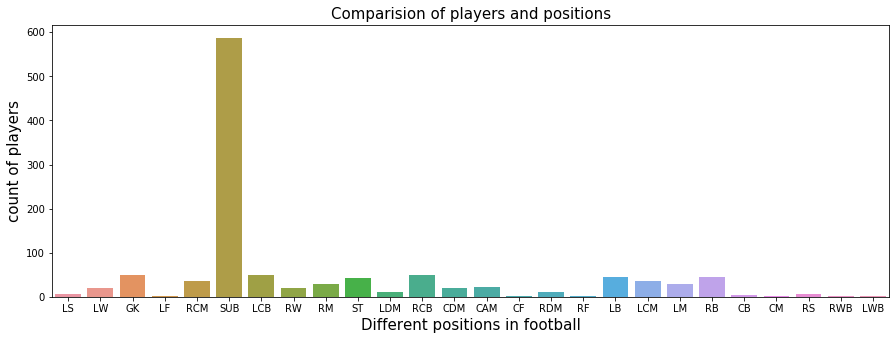

In [ ]:
plt.figure(figsize=(15,5))
ax=sns.countplot(df['nation_position'])
ax.set_xlabel(xlabel="Different positions in football",fontsize=15)
ax.set_ylabel(ylabel = "count of players",fontsize=15)
ax.set_title(label="Comparision of players and positions",fontsize=15)

 From the above Graph, we can see that majority of the players are substitute

In [ ]:
df=df.drop(['nation_jersey_number','joined','contract_valid_until','dob','player_url','long_name','nation_position','player_tags','loaned_from','player_traits'],axis=1)

In [ ]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   overall                     18278 non-null  int64  
 5   potential                   18278 non-null  int64  
 6   value_eur                   18278 non-null  int64  
 7   wage_eur                    18278 non-null  int64  
 8   international_reputation    18278 non-null  int64  
 9   weak_foot                   18278 non-null  int64  
 10  skill_moves                 18278 non-null  int64  
 11  release_clause_eur          16980 non-null  float64
 12  team_jersey_number          18038 non-null  float64
 13  contract_valid_until        180

In [ ]:
df.head(10)

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


In [ ]:
df['release_clause_eur'].fillna(df['release_clause_eur'].median,inplace=True)

In [ ]:
df['team_jersey_number'].replace(np.nan,0,inplace=True)

####Filling the  missing values of the goal keepers in the players section with value =0 

In [ ]:
df['pace'].fillna(value=0,inplace=True)

In [ ]:
df['shooting'].fillna(value=0,inplace=True)

In [ ]:
df['passing'].fillna(value=0,inplace=True)

In [ ]:
df['dribbling'].fillna(value=0,inplace=True)

In [ ]:
df['defending'].fillna(value=0,inplace=True)

In [ ]:
df['physic'].fillna(value=0,inplace=True)

#### Filling the missing values of players in the goal keeping section with value=0

In [ ]:
df['gk_diving'].fillna(value=0,inplace=True)

In [ ]:
df['gk_handling'].fillna(value=0,inplace=True)

In [ ]:
df['gk_kicking'].fillna(value=0,inplace=True)

In [ ]:
df['gk_reflexes'].fillna(value=0,inplace=True)

In [ ]:
df['gk_speed'].fillna(value=0,inplace=True)

In [ ]:
df['gk_positioning'].fillna(value=0,inplace=True)

In [ ]:
cat_df.columns

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [ ]:
df['ls'].replace(np.nan,0,inplace=True)
df['st'].fillna(value=0,inplace=True)
df['rs'].fillna(value=0,inplace=True)
df['lw'].fillna(value=0,inplace=True)
df['lf'].fillna(value=0,inplace=True)
df['cf'].fillna(value=0,inplace=True)
df['rf'].fillna(value=0,inplace=True)
df['rw'].fillna(value=0,inplace=True)
df['lam'].fillna(value=0,inplace=True)
df['cam'].fillna(value=0,inplace=True)
df['ram'].fillna(value=0,inplace=True)
df['lm'].fillna(value=0,inplace=True)
df['lcm'].fillna(value=0,inplace=True)
df['cm'].fillna(value=0,inplace=True)
df['rcm'].fillna(value=0,inplace=True)
df['rm'].fillna(value=0,inplace=True)
df['lwb'].fillna(value=0,inplace=True)
df['ldm'].fillna(value=0,inplace=True)
df['cdm'].fillna(value=0,inplace=True)
df['rdm'].fillna(value=0,inplace=True)
df['rwb'].fillna(value=0,inplace=True)
df['lb'].fillna(value=0,inplace=True)
df['lcb'].fillna(value=0,inplace=True)
df['cb'].fillna(value=0,inplace=True)
df['rcb'].fillna(value=0,inplace=True)
df['rb'].fillna(value=0,inplace=True)
df['team_position'].replace(np.nan,'SUB',inplace=True)



AttributeError: module 'seaborn' has no attribute 'histplot'

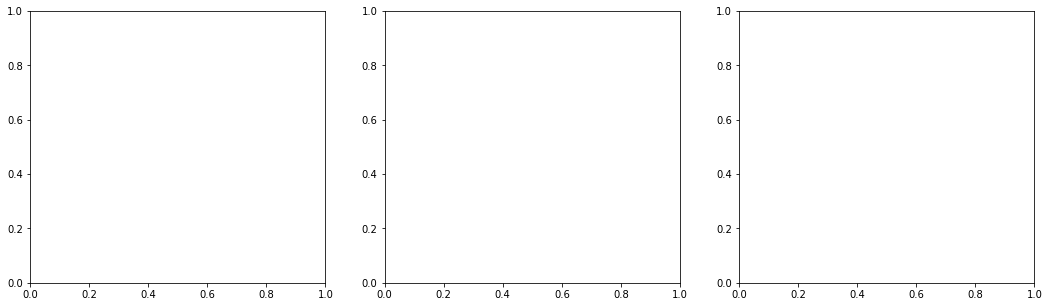

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(18,5))
sns.histplot(df['age'],ax=axes[0],color='r')
sns.histplot(df['height_cm'],ax=axes[1],color='g')
sns.histplot(df['weight_kg'],ax=axes[2],color='b')

Histogram plot of Age, Weight and Height

In [ ]:
top10wage=df['wage_eur'].sort_values(ascending=False).head(10)
top10wageplayers=print(df['short_name'][0],df['short_name'][4],df['short_name'][1],df['short_name'][5],df['short_name'][22],df['short_name'][19],df['short_name'][8],df['short_name'][36],df['short_name'][21],df['short_name'][18])
top10wageplayers

plt.figure(figsize=(15,6))
lst=['L. Messi', 'E. Hazard', 'Cristiano Ronaldo', 'K. De Bruyne', 'A. Griezmann', 'L. Suárez', 'L. Modrić', 'T. Kroos', 'Sergio Busquets', 'Sergio Ramos']
ax1=sns.barplot(top10wage,lst)
ax1.set_title(label='Histogram for the Overall Scores of the Players',fontsize=20)


From the above graph we can see that Messi,Hazard and Ronaldo are the top 3 players with the highest wage

In [ ]:
top10value=df['value_eur'].sort_values(ascending=False).head(10)
top10value
top10valueplayers=print(df['short_name'][2],df['short_name'][0],df['short_name'][10],df['short_name'][4],df['short_name'][5],df['short_name'][12],df['short_name'][9],df['short_name'][7],df['short_name'][3],df['short_name'][23])
top10valueplayers

plt.figure(figsize=(15,6))
lst1=['Neymar Jr', 'L. Messi', 'K. Mbappé', 'E. Hazard', 'K. De Bruyne', 'H. Kane', 'M. Salah', 'V. van Dijk', 'J. Oblak', 'P. Dybala']
ax2=sns.barplot(top10value,lst1)
ax2.set_title(label='Plot of Top 10 valued players',fontsize=20)

 From  the above graph, we can see that Neymar and Messi are the top 2 players having more value

In [ ]:
plt.figure(figsize= (15,8))

ax = sns.countplot(x='preferred_foot', data=df)
ax.set_title(label='Count of Players by Preferred foot', fontsize=20)

ax.set_xlabel(xlabel='Preffered foot')
ax.set_ylabel(ylabel='Count')

plt.show()


From the above countpolt, wee can see that majority of the palyers are right footed.

In [ ]:
plt.figure(figsize= (19,8))

ax = sns.countplot(x='age', data=df)
ax.set_title(label='Count of Players by age', fontsize=20)

ax.set_xlabel(xlabel='age')
ax.set_ylabel(ylabel='Count')

plt.show()

From the above countplot, we can say that majority of the players are aged between 20 to 27

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(25,10))
ax=sns.countplot(df['height_cm'],ax=axes[0])
ax.set(xlabel="height in cm", ylabel = "count of players",title="Count of players on the basis of height")

ax=sns.countplot(df['weight_kg'],ax=axes[1])
ax.set(xlabel="weight in kgs", ylabel = "count of players",title="Count of players on the basis of weight")

Here we can see the majority of the players are with the height of 180cm and weight of 70kg

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.histplot(df['overall'])
ax.set_xlabel(xlabel='Overall score range',fontsize=15)
ax.set_ylabel(ylabel = "count of players",fontsize=15)
ax.set_title(label='Histogram for the Overall Scores of the Players',fontsize=20)

##Histogram of Potential of the players
*From this graph we can see that majority of the people are having the potential score 0f 70*

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.histplot(df['potential'])
ax.set_xlabel(xlabel='potential range',fontsize=15)
ax.set_ylabel(ylabel = "count of players",fontsize=15)
ax.set_title(label='Histogram for the potential of the Players',fontsize=20)

From the above Histogram, We can see that average of overall score of players is 64

In [ ]:
plt.figure(figsize=(15,6))
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia','United States','Russia','Portugal','Hungary','Canada')
countries = df.loc[df['nationality'].isin(some_countries) & df['overall']]

ax=sns.boxplot(countries['nationality'],countries['overall'])
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)

From the above Boxplot we can observe the distribution of overaal scores of palyers grouped according to their country.

In [ ]:
plt.figure(figsize=(15,6))
some_clubs = ('FC Barcelona','Arsenal','Paris Saint-Germain','Liverpool','Manchester United','Juventus','Viking FK','Atlético Madrid','Atlético Huila','Real Madrid','Chelsea','Manchester city','Crystal Palace''Lazio')
club = df.loc[df['club'].isin(some_clubs) & df['overall']]

ax=sns.barplot(club['club'],club['overall'])
ax.set_xlabel(xlabel = 'Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different clubs', fontsize = 20)

From the above plot we can observe the distribution of overaal scores of palyers grouped according to their Club.

In [ ]:
counts_club = df["club"].value_counts()
counts_club = counts_club.reset_index()
counts_club.columns= ["clubs","Counts"]
counts_club.head()
sns.catplot(y="clubs",x="Counts",data=counts_club.head(25),height=10,kind="bar")
plt.title("Club Wise Players Counts",fontsize=50);

From the above plot, we can observe that all the clubs contain same number of players

In [ ]:
avgwageoverall = df.groupby("club", as_index=False)["wage_eur","overall"].mean()
avgwageoverall.sort_values(by="wage_eur",inplace=True,ascending=False)
top10bywage = avgwageoverall.iloc[0:15,:]
sns.catplot(y="club", x="wage_eur",data=top10bywage,height=6,kind="bar",aspect=2)
plt.title("Top 15 clubs with highest mean Wage")

From this graph we can say that Real Madrid,FC Barcelona,Manchester city are the top 3 clubs which has the highest mean wage

In [ ]:

plt.figure(figsize= (19,8))

ax = sns.countplot(x='overall', data=df)
ax.set_title(label='Count of Players by overall', fontsize=20)

ax.set_xlabel(xlabel='Overall')
ax.set_ylabel(ylabel='Count')

plt.show()

From the above Histogram, we can see that maximum number of players with score between 64 to 66 

In [ ]:
df.head()

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
new_df=df.copy()
new_df[[ 'short_name','nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'team_position']]=new_df[[ 'short_name','nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'team_position']].apply(label.fit_transform)



In [ ]:
df['short_name']=label.fit_transform(df['short_name'])
df['nationality']=label.fit_transform(df['nationality'])
df['club']=label.fit_transform(df['club'])
df['player_positions']=label.fit_transform(df['player_positions'])
df['preferred_foot']=label.fit_transform(df['preferred_foot'])
df['work_rate']=label.fit_transform(df['work_rate'])
df['body_type']=label.fit_transform(df['body_type'])
df['real_face']=label.fit_transform(df['real_face'])
df['team_position']=label.fit_transform(df['team_position'])


In [ ]:
df.head(5)

In [ ]:
pd.set_option('display.max_columns',None)
new_df.head(10)

In [ ]:
delete=new_df[['ls','st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb','release_clause_eur']]


In [ ]:
new_df.drop(delete,axis=1,inplace=True)

In [ ]:
new_df.shape

In [ ]:
new_df.head()

## Removing outliers using zscore

In [ ]:
from  scipy import stats
z=np.abs(stats.zscore(new_df))
z

threshold=4
print(np.where(z>3))

new_dff=new_df[(z<3).all(axis=1)]
new_dff.shape

## Applying correlation for feature selection

In [ ]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range (i):
      if (corr_matrix.iloc[i,j])>=threshold:
        col_name=corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

In [ ]:
corr_features=correlation(new_dff,0.8)
len(corr_features)

In [ ]:
corr_features

In [ ]:
new_dff.drop(corr_features,axis=1,inplace=True)

In [ ]:
new_dff

In [ ]:
names = new_dff.short_name.tolist() 
nationality=new_dff.nationality.tolist()
overall=new_dff.overall.to_list()
value_eur=new_dff.value_eur.to_list()
age=new_dff.age.to_list()
team_position=new_dff.team_position.to_list()
international_reputation=new_dff.international_reputation.to_list()
club=new_dff.club.to_list()
#wage_eur=new_dff.wage_eur.to_list()
preferred_foot=new_dff.preferred_foot.to_list()
work_rate=new_dff.work_rate.to_list()
weak_foot=new_dff.weak_foot.to_list()
skill_moves=new_dff.skill_moves.to_list()
height_cm=new_dff.height_cm.to_list()
weight_kg=new_dff.weight_kg.to_list()
#physic=new_dff.physic.to_list()
defending=new_dff.defending.to_list()
#dribbling=new_dff.dribbling.to_list()
shooting=new_dff.shooting.to_list()
gk_diving=new_dff.gk_diving.to_list()
power_stamina=new_dff.power_stamina.to_list()
attacking_heading_accuracy=new_dff.attacking_heading_accuracy.to_list()


# Feature scaling

In [ ]:
from sklearn import preprocessing
new_df=new_df.values # numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(new_dff)
X_norm = pd.DataFrame(x_scaled)

# Dimensionality redicuction by PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [ ]:
reduced

##Elbow method to know the optimum number of clusters

# Elbow method

In [ ]:
#finding optimal number of clusters
from sklearn.cluster import KMeans

wcss=[]     #within cluster sum of squares   

for i in range(1,10):  #cluster value might be 2 3 5
  model=KMeans(n_clusters=i)   #kmeans(3 or 4 or 2)
  model.fit(reduced)
  model.predict(reduced)
  wcss_iter=model.inertia_   #inertia gives the sum of squares within cluster
  wcss.append(wcss_iter)      

wcss

In [ ]:
plt.plot(range(1,10),wcss,marker='*')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model=KMeans(n_clusters=4)   #default n cluster size is 2

In [ ]:
model.fit(reduced)

In [ ]:
clusters=model.predict(reduced)

In [ ]:
clusters

In [ ]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced['nationality']=nationality
reduced['overall']=overall
reduced['value_eur']=value_eur
reduced['international_reputation']=international_reputation
reduced['age']=age
reduced['team_position']=team_position
reduced['club'] = club
reduced['preferred_foot'] = preferred_foot
reduced['work_rate'] = work_rate
reduced['weak_foot'] = weak_foot
reduced['skill_moves'] = skill_moves
reduced['height_cm'] = height_cm
reduced['weight_kg'] = weight_kg
reduced['defending'] = defending
reduced['shooting'] = shooting
reduced['gk_diving'] = gk_diving
reduced['power_stamina'] = power_stamina
reduced['attacking_heading_accuracy'] = attacking_heading_accuracy


shooting=new_dff.shooting.to_list()
gk_diving=new_dff.gk_diving.to_list()
power_stamina=new_dff.power_stamina.to_list()
attacking_heading_accuracy=new_dff.attacking_heading_accuracy.to_list()

reduced.columns = ['x', 'y', 'cluster','name','nationality','overall','value_eur','international_reputation','age','team_position','club','preferred_foot','work_rate','weak_foot','skill_moves','height_cm','weight_kg','defending','shooting','gk_diving','power_stamina','attacking_heading_accuracy']
reduced.head()

In [ ]:
fig,ax=plt.subplots(figsize=(6,5))
ax.scatter(reduced['x'],reduced['y'],c=clusters)

From the above plot, we can see that players are clusterd in 4 clusters

# Model Evaluation

In [ ]:
from sklearn.metrics import silhouette_score
x=reduced.iloc[:,:2]
silhouette_score(x,clusters)
silhouette_score(x,labels=clusters,metric='euclidean')

##Dividing the clusters for visualization

In [ ]:
cluster0= reduced[reduced.cluster==0]
cluster1= reduced[reduced.cluster==1]
cluster2= reduced[reduced.cluster==2]
cluster3= reduced[reduced.cluster==1]

##Scatter plot of cluster vs overall
*Here we can see the distribution of players with overall scores in each cluster*

In [ ]:
fig = go.Figure(data=go.Scatter(
    x = reduced['cluster'],
    y = reduced['overall'],
    mode='markers',
    marker=dict(
        color=reduced['overall'], 
        showscale=True
    ),
    text= reduced['name'],
))

fig.update_layout(title='cluster vs Overall Rating',
                  xaxis_title='cluster',
                  yaxis_title='Overall Rating')
fig.show()

##Scatter plot of clusters

In [ ]:

import plotly.graph_objs as go

fig, ax = plt.subplots(1,4, figsize=(20, 6))
ax[0].scatter(x=cluster0['x'],y=cluster0['y'],c=cluster0['cluster'],cmap='RdYlBu')
ax[0].set_xlabel("cluster 0")

ax[1].scatter(x=cluster1['x'],y=cluster1['y'],c=cluster1['cluster'],cmap='summer')
ax[1].set_xlabel("cluster 1")

ax[2].scatter(x=cluster2['x'],y=cluster2['y'],c=cluster2['cluster'],cmap='winter')
ax[2].set_xlabel("cluster 2")

ax[3].scatter(x=cluster3['x'],y=cluster3['y'],c=cluster3['cluster'],cmap='PRGn')
ax[3].set_xlabel("cluster 3")

plt.show()

##Count of players by overall in each cluster

In [ ]:
import plotly.graph_objs as go


fig,axes=plt.subplots(2,2,figsize=(30,10))
ax=sns.countplot(cluster0['overall'],ax=axes[0][0])
ax.set(xlabel="overall", ylabel = "count of players",title="Count of players on the basis of overall in cluster 0")

ax=sns.countplot(cluster1['overall'],ax=axes[0][1])
ax.set(xlabel="overall", ylabel = "count of players",title="Count of players on the basis of overall in cluster 1")

ax=sns.countplot(cluster2['overall'],ax=axes[1][0])
ax.set(xlabel="overall", ylabel = "count of players",title="Count of players on the basis of overall in cluster 2")

ax=sns.countplot(cluster3['overall'],ax=axes[1][1])
ax.set(xlabel="overall", ylabel = "count of players",title="Count of players on the basis of overall in cluster 3")



##Count of the players on the basis of AGE in each cluster

In [ ]:

fig,axes=plt.subplots(2,2,figsize=(35,10))
ax=sns.countplot(cluster0['age'],ax=axes[0][0])
ax.set(xlabel="age", ylabel = "count of players",title="Count of players on the basis of age in cluster 0")

ax=sns.countplot(cluster1['age'],ax=axes[0][1])
ax.set(xlabel="age", ylabel = "count of players",title="Count of players on the basis of age in cluster 1")

ax=sns.countplot(cluster2['age'],ax=axes[1][0])
ax.set(xlabel="age", ylabel = "count of players",title="Count of players on the basis of age in cluster 2")

ax=sns.countplot(cluster3['age'],ax=axes[1][1])
ax.set(xlabel="age", ylabel = "count of players",title="Count of players on the basis of age in cluster 3")

##Count of the players on the basis of Gk_diving in each cluster
*Here we can see There is only variations in the graph for the cluster with goalkeepers because the attribute we have given here is of the goal keeper*


*From this we can get to know which cluster contains goalkeeper*

In [ ]:

fig,axes=plt.subplots(1,4,figsize=(30,5))
ax=sns.countplot(cluster0['gk_diving'],ax=axes[0])
ax.set(xlabel="overall", ylabel = "count of players",title="Count of players on the basis of gk_diving in cluster 0")

ax=sns.countplot(cluster1['gk_diving'],ax=axes[1])
ax.set(xlabel="gk_diving", ylabel = "count of players",title="Count of players on the basis of gk_diving in cluster 1")

ax=sns.countplot(cluster2['gk_diving'],ax=axes[2])
ax.set(xlabel="gk_diving", ylabel = "count of players",title="Count of players on the basis of gk_diving in cluster 2")

ax=sns.countplot(cluster3['gk_diving'],ax=axes[3])
ax.set(xlabel="gk_diving", ylabel = "count of players",title="Count of players on the basis of gk_diving in cluster 3")

##Count of the player on the basis of power stamina in each cluster

In [ ]:

fig,axes=plt.subplots(2,2,figsize=(40,15))
ax=sns.countplot(cluster0['power_stamina'],ax=axes[0][0])
ax.set(xlabel="power_stamina", ylabel = "count of players",title="Count of players on the basis of power_stamina in cluster 0")

ax=sns.countplot(cluster1['power_stamina'],ax=axes[0][1])
ax.set(xlabel="power_stamina", ylabel = "count of players",title="Count of players on the basis of power_stamina in cluster 1")

ax=sns.countplot(cluster2['power_stamina'],ax=axes[1][0])
ax.set(xlabel="power_stamina", ylabel = "count of players",title="Count of players on the basis of power_stamina in cluster 2")

ax=sns.countplot(cluster3['power_stamina'],ax=axes[1][1])
ax.set(xlabel="power_stamina", ylabel = "count of players",title="Count of players on the basis of power_stamina in cluster 3")

##Count of the player on the basis of preferred_foot in each cluster
*We can see that Majority of the people have Right foot in all the clusters*

In [ ]:

fig,axes=plt.subplots(1,4,figsize=(25,5))
ax=sns.countplot(cluster0['preferred_foot'],ax=axes[0])
ax.set(xlabel="preferred_foot", ylabel = "count of players",title="Count of players on the basis of preferred_foot in cluster 0")

ax=sns.countplot(cluster1['preferred_foot'],ax=axes[1])
ax.set(xlabel="preferred_foot", ylabel = "count of players",title="Count of players on the basis of preferred_foot in cluster 1")

ax=sns.countplot(cluster2['preferred_foot'],ax=axes[2])
ax.set(xlabel="preferred_foot", ylabel = "count of players",title="Count of players on the basis of preferred_foot in cluster 2")

ax=sns.countplot(cluster3['preferred_foot'],ax=axes[3])
ax.set(xlabel="preferred_foot", ylabel = "count of players",title="Count of players on the basis of preferred_foot in cluster 3")

## Count of the players on the basis of attacking_heading_accuracy in each cluster

In [ ]:

fig,axes=plt.subplots(2,2,figsize=(35,15))
ax=sns.countplot(cluster0['attacking_heading_accuracy'],ax=axes[0][0])
ax.set(xlabel="attacking_heading_accuracy", ylabel = "count of players",title="Count of players on the basis of attacking_heading_accuracy in cluster 0")

ax=sns.countplot(cluster1['attacking_heading_accuracy'],ax=axes[0][1])
ax.set(xlabel="attacking_heading_accuracy", ylabel = "count of players",title="Count of players on the basis of attacking_heading_accuracy in cluster 1")

ax=sns.countplot(cluster2['attacking_heading_accuracy'],ax=axes[1][0])
ax.set(xlabel="attacking_heading_accuracy", ylabel = "count of players",title="Count of players on the basis of attacking_heading_accuracy in cluster 2")

ax=sns.countplot(cluster3['attacking_heading_accuracy'],ax=axes[1][1])
ax.set(xlabel="attacking_heading_accuracy", ylabel = "count of players",title="Count of players on the basis of attacking_heading_accuracy in cluster 3")

##Count of players based on defending in each cluster
*Here goal keeper has no variations in graph or 0 because goalkeepers won't defend on field*

In [ ]:

fig,axes=plt.subplots(2,2,figsize=(55,15))
ax=sns.countplot(cluster0['defending'],ax=axes[0][0])
ax.set(xlabel="defending", ylabel = "count of players",title="Count of players on the basis of defending in cluster 0")

ax=sns.countplot(cluster1['defending'],ax=axes[0][1])
ax.set(xlabel="defending", ylabel = "count of players",title="Count of players on the basis of defending in cluster 1")

ax=sns.countplot(cluster2['defending'],ax=axes[1][0])
ax.set(xlabel="defending", ylabel = "count of players",title="Count of players on the basis of defending in cluster 2")

ax=sns.countplot(cluster3['defending'],ax=axes[1][1])
ax.set(xlabel="defending", ylabel = "count of players",title="Count of players on the basis of defending in cluster 3")

##Count of players on the basis of workrate in each cluster

In [ ]:
 import warnings
warnings.simplefilter("ignore")

fig,axes=plt.subplots(1,4,figsize=(25,5))
ax=sns.countplot(cluster0['work_rate'],ax=axes[0])
ax.set(xlabel="work_rate", ylabel = "count of players",title="Count of players on the basis of work_rate in cluster 0")

ax=sns.countplot(cluster1['work_rate'],ax=axes[1])
ax.set(xlabel="work_rate", ylabel = "count of players",title="Count of players on the basis of work_rate in cluster 1")

ax=sns.countplot(cluster2['work_rate'],ax=axes[2])
ax.set(xlabel="work_rate", ylabel = "count of players",title="Count of players on the basis of work_rate in cluster 2")

ax=sns.countplot(cluster3['work_rate'],ax=axes[3])
ax.set(xlabel="work_rate", ylabel = "count of players",title="Count of players on the basis of work_rate in cluster 3")